In [ ]:
# prompt: mount with drive and access a folder for dataset importing

from google.colab import drive
drive.mount('/content/drive')


# Replace 'path/to/your/dataset' with the actual path to your dataset in Google Drive
# data = pd.read_csv('/content/drive/My Drive/path/to/your/dataset/your_file.csv')
# print(data.head())


In [1]:
import json
import csv
import pandas as pd
import numpy as np
from collections import defaultdict

# folder_path='/content/drive/My Drive/DataExtractor/'
folder_path=''
# Load JSON data
with open(folder_path+"fixed_merger_data_with_newout.json", "r") as json_file:
    data = json.load(json_file)
    
folder = folder_path+"with_new_outside/"

In [2]:

entries = []
scan_lists = []

entry_id = 1
scan_id = 1
for room_no, room_data in data.items():
    for entry in room_data.values():
        # Calculate number of scans and average data per scan
        scan_list = entry.get("ScanList", [])
        num_scans = len(scan_list)

        if num_scans == 0:
            continue  # Skip entries with 0 scans

        avg_data_per_scan = (
            sum(len(scan_group) for scan_group in scan_list) / num_scans if num_scans > 0 else 0
        )

        # Extract metadata for entries.csv
        entries.append([
            entry_id,
            room_no,
            entry.get("StudentID"),
            entry.get("DeviceModel"),
            entry.get("BatteryLifeBefore"),
            entry.get("BatteryLifeAfter"),
            entry.get("DateTime"),
            num_scans,
            round(avg_data_per_scan, 2)  # Rounded to 2 decimal places
        ])

        # Extract scan list for scan_lists.csv
        for group_index, scan_group in enumerate(scan_list):
            for scan in scan_group:
                scan_lists.append([
                    scan_id,
                    entry_id,
                    group_index,
                    scan.get("Frequency"),
                    scan.get("MacAddress"),
                    scan.get("SSID"),
                    scan.get("Strength")
                ])
                scan_id += 1

        entry_id += 1


# Write entries.csv
with open(folder + "entries.csv", "w", newline="") as entries_file:
    writer = csv.writer(entries_file)
    writer.writerow(["entryId", "roomNo", "StudentID", "DeviceModel", "BatteryLifeBefore", "BatteryLifeAfter", "DateTime", "NumScans", "AvgDataPerScan"])
    writer.writerows(entries)

# Write scan_lists.csv
with open(folder + "scan_lists.csv", "w", newline="") as scan_lists_file:
    writer = csv.writer(scan_lists_file)
    writer.writerow(["scanId", "entryId", "scanGroupIndex", "Frequency", "MacAddress", "SSID", "Strength"])
    writer.writerows(scan_lists)

print("CSV files created successfully!")


CSV files created successfully!


In [3]:
# File paths
scan_list_csv = folder+"scan_lists.csv"

# Data structures to store statistics
ssid_counts = defaultdict(int)  # To count occurrences of each SSID
mac_to_ssid = defaultdict(set)  # To map each MAC address to the corresponding SSIDs
ssid_to_macs = defaultdict(lambda: defaultdict(int))  # To count MAC addresses per SSID

# Read the scan_lists.csv file
with open(scan_list_csv, "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        ssid = row["SSID"]
        mac_address = row["MacAddress"]

        # Update SSID count
        ssid_counts[ssid] += 1

        # Map MAC address to SSIDs
        mac_to_ssid[mac_address].add(ssid)

        # Count MAC addresses for each SSID
        ssid_to_macs[ssid][mac_address] += 1

# Check if each MAC corresponds to a unique SSID
mac_unique_ssid = {mac: len(ssids) == 1 for mac, ssids in mac_to_ssid.items()}

# Display the results
print("SSID statistics:")
for ssid, count in ssid_counts.items():
    print(f"SSID: {ssid}, Total Count: {count}")
    print("  MAC Addresses and their counts:")
    for mac, mac_count in ssid_to_macs[ssid].items():
        print(f"    MAC: {mac}, Count: {mac_count}")
    print()


SSID statistics:
SSID: iPhone (3), Total Count: 66
  MAC Addresses and their counts:
    MAC: 96:33:56:57:7a:84, Count: 66

SSID: , Total Count: 3412
  MAC Addresses and their counts:
    MAC: 34:60:f9:a1:88:62, Count: 316
    MAC: 34:60:f9:a1:88:63, Count: 341
    MAC: 5c:e9:31:22:be:d6, Count: 159
    MAC: bc:22:28:21:09:22, Count: 316
    MAC: bc:22:28:21:09:b7, Count: 216
    MAC: 34:60:f9:a1:8b:8e, Count: 117
    MAC: bc:22:28:21:55:6c, Count: 194
    MAC: bc:22:28:21:09:b8, Count: 299
    MAC: 5c:e9:31:22:bb:0a, Count: 209
    MAC: 1c:61:b4:9c:79:f2, Count: 164
    MAC: 34:60:f9:a1:88:56, Count: 241
    MAC: 34:60:f9:a1:88:57, Count: 176
    MAC: 24:2f:d0:88:39:a2, Count: 128
    MAC: 82:af:ca:21:95:ea, Count: 32
    MAC: 5c:e9:31:22:c8:de, Count: 49
    MAC: 1c:61:b4:9c:7a:1a, Count: 115
    MAC: 6e:7e:bf:c3:83:0e, Count: 2
    MAC: 5c:e9:31:22:bf:96, Count: 43
    MAC: 1c:61:b4:9c:79:f3, Count: 4
    MAC: 34:60:f9:a1:8b:8f, Count: 9
    MAC: bc:22:28:21:70:60, Count: 7
    MAC:

In [4]:

# File paths
scan_list_csv = folder + "scan_lists.csv"

# Data structures to store statistics
mac_counts = defaultdict(int)  # To count occurrences of each MAC address
mac_to_ssid_counts = defaultdict(lambda: defaultdict(int))  # To count SSIDs under each MAC address

# Read the scan_lists.csv file
with open(scan_list_csv, "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        ssid = row["SSID"]
        mac_address = row["MacAddress"]

        # Update MAC address count
        mac_counts[mac_address] += 1

        # Count SSID occurrences under each MAC address
        mac_to_ssid_counts[mac_address][ssid] += 1

# Display the results
print("MAC Address Count and Corresponding SSID Counts:")
for mac, mac_count in mac_counts.items():
    print(f"MAC: {mac}, Total Count: {mac_count}")
    print("  SSID(s) and their counts:")
    for ssid, ssid_count in mac_to_ssid_counts[mac].items():
        print(f"    SSID: {ssid}, Count: {ssid_count}")
    print()

MAC Address Count and Corresponding SSID Counts:
MAC: 96:33:56:57:7a:84, Total Count: 66
  SSID(s) and their counts:
    SSID: iPhone (3), Count: 66

MAC: 34:60:f9:a1:88:62, Total Count: 316
  SSID(s) and their counts:
    SSID: , Count: 316

MAC: 5c:e8:d3:0a:1e:e0, Total Count: 302
  SSID(s) and their counts:
    SSID: !FreeNet, Count: 302

MAC: 34:60:f9:a1:88:63, Total Count: 341
  SSID(s) and their counts:
    SSID: , Count: 341

MAC: bc:22:28:21:09:24, Total Count: 488
  SSID(s) and their counts:
    SSID: CSE-205, Count: 488

MAC: 5c:e9:31:22:be:d6, Total Count: 159
  SSID(s) and their counts:
    SSID: , Count: 159

MAC: bc:22:28:21:09:22, Total Count: 316
  SSID(s) and their counts:
    SSID: , Count: 316

MAC: bc:22:28:21:09:21, Total Count: 746
  SSID(s) and their counts:
    SSID: CSE-205, Count: 746

MAC: 26:94:5a:1b:90:4d, Total Count: 556
  SSID(s) and their counts:
    SSID: Tatakae🥷, Count: 556

MAC: 30:b5:c2:ea:5b:44, Total Count: 622
  SSID(s) and their counts:
    SSI

In [5]:
# File paths
scan_list_csv = folder+"scan_lists.csv"
entries_csv = folder+"entries.csv"
output_csv = folder+"mac_address_statistics.csv"


# Data structure to store scan data per entryId
entry_scans = defaultdict(list)

# Data structure to store total number of scans per entryId (from entries.csv)
entry_num_scans = {}

# Read the entries.csv file and get the total number of scans for each entryId
with open(entries_csv, "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        entry_id = int(row["entryId"])
        num_scans = int(row["NumScans"])
        entry_num_scans[entry_id] = num_scans

# Read the scan_lists.csv file and collect scan data
with open(scan_list_csv, "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        entry_id = int(row["entryId"])
        mac_address = row["MacAddress"]
        ssid = row["SSID"]
        strength = int(row["Strength"])

        entry_scans[entry_id].append({
            "mac_address": mac_address,
            "ssid": ssid,
            "strength": strength
        })

# Remove outliers (top 20% and bottom 20%)
def remove_outliers(data):
    if len(data) < 5:  # Not enough data to remove outliers
        return data
    sorted_data = sorted(data)
    n = len(sorted_data)
    lower_index = int(n * 0.2)
    upper_index = int(n * 0.8)
    return sorted_data[lower_index:upper_index]

# Prepare the list for output CSV
output_data = []

# Process each entryId and its corresponding scans
for entry_id, scans in entry_scans.items():
    mac_stats = defaultdict(list)
    mac_to_ssid = {}

    # Collect scan data for each MAC address
    for scan in scans:
        mac_address = scan["mac_address"]
        ssid = scan["ssid"]
        strength = scan["strength"]
        
        mac_to_ssid[mac_address] = ssid

        # Store the strength for averaging
        mac_stats[mac_address].append(strength)

    # Process each MAC address for statistics
    for mac_address, strengths in mac_stats.items():
        num_scans = entry_num_scans.get(entry_id, 0)  # Get total scans for entryId from entry_num_scans

        # Average strength and standard deviation
        avg_strength = np.mean(strengths)
        std_dev = np.std(strengths)

        # Calculate the average strength and standard deviation after removing outliers
        filtered_strengths = remove_outliers(strengths)
        avg_strength_no_outliers = np.mean(filtered_strengths) if filtered_strengths else 0
        std_dev_no_outliers = np.std(filtered_strengths) if filtered_strengths else 0
        count_no_outliers = len(filtered_strengths)

        ssid = mac_to_ssid[mac_address]

        # Add the row to output data
        output_data.append([
            entry_id,  # The entryId
            num_scans,  # The total number of scans for the entryId (same for all rows of the same entryId)
            mac_address,  # The MAC address
            ssid,  # The SSID (consistent for each MAC address in the entry)
            len(strengths),  # The count of scans for this particular MAC address
            round(avg_strength, 2),  # Average strength
            round(std_dev, 2),  # Standard deviation
            round(avg_strength_no_outliers, 2),  # Average strength after removing outliers
            count_no_outliers,  # Count of valid scans after removing outliers
            round(std_dev_no_outliers, 2)  # Standard deviation after removing outliers
        ])

# Write the results to the new CSV file
with open(output_csv, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow([
        "entryId", "numOfScans", "macAddress", "ssid", "countOfMac",
        "avgStrength", "stdDev", "avgStrengthNoOutliers", "countNoOutliers", "stdDevNoOutliers"
    ])
    writer.writerows(output_data)

print("Statistics CSV created successfully!")


Statistics CSV created successfully!


In [6]:

# Load the input CSV
input_csv = folder+"mac_address_statistics.csv"  # Replace with your actual file name
data = pd.read_csv(input_csv)

# Group by macAddress, aggregate count, and retain unique ssid
result = (
    data.groupby("macAddress")
    .agg(
        ssid=("ssid", "first"),  # Get the first (and only) ssid per macAddress
        total_count=("macAddress", "size"),  # Count the occurrences
    )
    .reset_index()
)

# Sort by total count in descending order
result = result.sort_values(by="total_count", ascending=False)

# Save to a new CSV
output_csv = folder+"mac_count.csv"  # Desired output file name
result.to_csv(output_csv, index=False)

print("New CSV file created successfully:", output_csv)


New CSV file created successfully: with_new_outside/mac_count.csv


In [7]:

# Define the SafeMacs list
SafeMacs = [
    "60:63:4c:31:37:40", "30:b5:c2:ea:5b:44", "18:0f:76:c3:06:8d", "00:22:b0:05:f3:bc",
    "bc:22:28:21:09:21", "36:20:f9:a1:88:62", "36:20:f9:a1:88:56", "bc:22:28:21:09:24",
    "36:62:f9:a1:88:63", "bc:22:28:21:55:6b", "34:e8:94:10:7d:fa", "36:20:f9:a1:8b:8e",
    "36:20:f9:a1:8b:8e", "5e:a9:31:22:bb:0a", "bc:22:28:21:55:6e", "bc:22:28:21:09:ba",
    "26:2f:d0:88:39:a2", "36:62:f9:a1:88:57", "60:63:4c:31:37:60", "10:62:eb:77:b7:42",
    "00:1e:2a:ba:c8:20", "70:4c:a5:95:b6:00", "60:63:4c:31:37:48"
]

# Load the input CSV
input_csv = folder+"mac_address_statistics.csv"
data = pd.read_csv(input_csv)

# Filter rows where macAddress is in the SafeMacs list
filtered_data = data[data["macAddress"].isin(SafeMacs)]

# Save the filtered data to a new CSV
output_csv = folder+"filtered_output.csv"  # Desired output file name
filtered_data.to_csv(output_csv, index=False)

print("Filtered CSV file created successfully:", output_csv)

Filtered CSV file created successfully: with_new_outside/filtered_output.csv


In [8]:
# Load the additional CSV with room information
room_info_csv = folder+"entries.csv"  # Replace with the actual file name
room_data = pd.read_csv(room_info_csv)

# Create a pivot table with entryId as rows, macAddress as columns, and avgStrengthNoOutliers as values
pivot_table = filtered_data.pivot_table(
    index="entryId", columns="macAddress", values="avgStrengthNoOutliers", aggfunc="mean"
)

# Fill missing values with -90
pivot_table = pivot_table.fillna(-90)

# Add a multi-index column for macAddress and SSID
ssid_mapping = dict(zip(filtered_data["macAddress"], filtered_data["ssid"]))
column_tuples = [(mac, ssid_mapping.get(mac, "Unknown")) for mac in SafeMacs]
pivot_table = pivot_table.reindex(columns=[mac for mac, _ in column_tuples], fill_value=-90)
pivot_table.columns = pd.MultiIndex.from_tuples(column_tuples, names=["macAddress", "SSID"])

# Flatten the multi-level columns and convert each element to a string before joining
pivot_table.columns = ["_".join(str(col) for col in item).strip() for item in pivot_table.columns]

# Reset index to make entryId a column
pivot_table = pivot_table.reset_index()

# Merge with room information using entryId
merged_data = pd.merge(room_data[["entryId", "roomNo"]], pivot_table, on="entryId", how="left")

# Save the matrix to a new CSV
output_csv = folder+"matrix.csv"
merged_data.to_csv(output_csv, index=False)

print("Transformed CSV file created successfully:", output_csv)

Transformed CSV file created successfully: with_new_outside/matrix.csv


/home/nahin/anaconda3/envs/image_ml/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



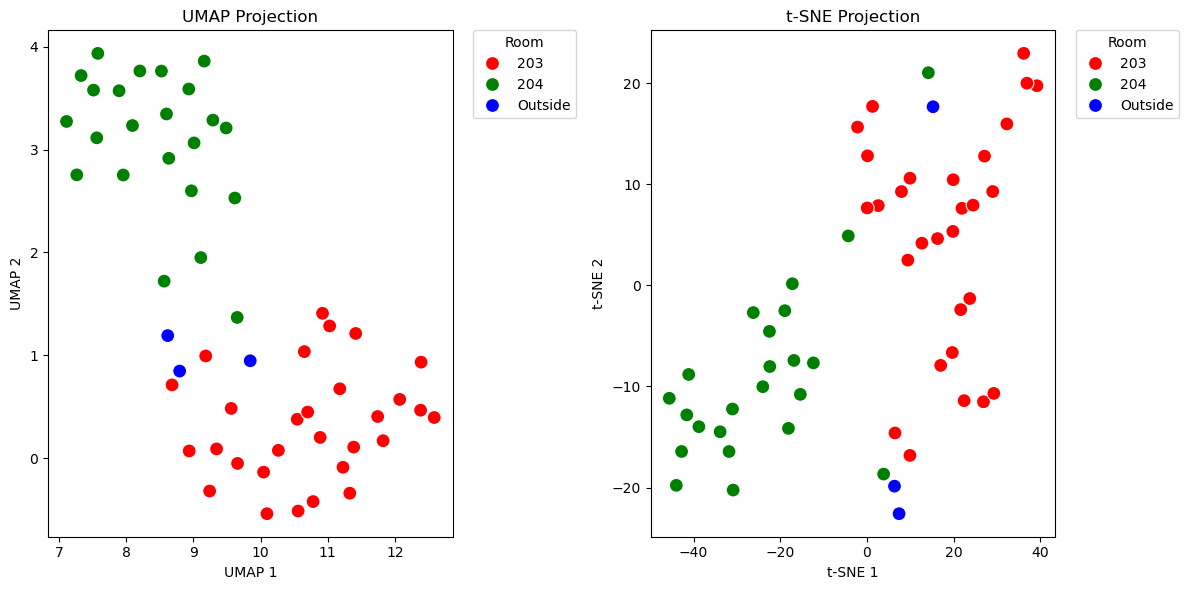

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from umap import UMAP

data = pd.read_csv(folder+"matrix.csv")

# Extract features (columns starting from the 3rd)
features = data.iloc[:, 2:].values

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Generate UMAP embeddings
umap_reducer = UMAP(random_state=42)
umap_embedding = umap_reducer.fit_transform(features_scaled)

# Generate t-SNE embeddings
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_embedding = tsne.fit_transform(features_scaled)

# Define custom color palette for rooms
custom_palette = {
    '203': 'red',
    '204': 'green',
    'Outside': 'blue',
    '203unk': 'yellow',
    '204unk': 'purple',
    '205unk': 'black'
}

# Plot UMAP
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=umap_embedding[:, 0],
    y=umap_embedding[:, 1],
    hue=data["roomNo"],
    palette=custom_palette,  # Use custom palette
    s=100
)
plt.title("UMAP Projection")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Room", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Plot t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=tsne_embedding[:, 0],
    y=tsne_embedding[:, 1],
    hue=data["roomNo"],
    palette=custom_palette,  # Use custom palette
    s=100
)
plt.title("t-SNE Projection")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Room", loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Adjust layout to make space for the legends outside the plots
plt.tight_layout()

# Show plot
plt.show()


In [44]:
import plotly.express as px
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from umap import UMAP

# Load data
data = pd.read_csv(folder + "matrix.csv")

# Extract features (columns starting from the 3rd)
features = data.iloc[:, 2:].values

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Generate UMAP embeddings
umap_reducer = UMAP(random_state=42)
umap_embedding = umap_reducer.fit_transform(features_scaled)

# Generate t-SNE embeddings
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_embedding = tsne.fit_transform(features_scaled)

# Add embeddings to the dataframe
data["UMAP_1"] = umap_embedding[:, 0]
data["UMAP_2"] = umap_embedding[:, 1]
data["tSNE_1"] = tsne_embedding[:, 0]
data["tSNE_2"] = tsne_embedding[:, 1]

# Plot UMAP with Plotly
fig_umap = px.scatter(
    data,
    x="UMAP_1",
    y="UMAP_2",
    color="roomNo",
    hover_data=data.columns[0],  # Display additional info on hover
    title="UMAP Projection",
    color_discrete_map={
        '203': 'red',
        '204': 'green',
        'Outside': 'blue',
        '203unk': 'yellow',
        '204unk': 'purple',
        '205unk': 'black'
    }
)

fig_umap.show()

# Plot t-SNE with Plotly
fig_tsne = px.scatter(
    data,
    x="tSNE_1",
    y="tSNE_2",
    color="roomNo",
    hover_data=data.columns[0],  # Display additional info on hover
    title="t-SNE Projection",
    color_discrete_map={
        '203': 'red',
        '204': 'green',
        'Outside': 'blue',
        '203unk': 'yellow',
        '204unk': 'purple',
        '205unk': 'black'
    }
)

fig_tsne.show()


/home/nahin/anaconda3/envs/image_ml/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [73]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from umap import UMAP

# Load your data
data = pd.read_csv(folder + "matrix.csv")

# Extract features (columns starting from the 3rd)
features = data.iloc[:, 2:].values

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform DBSCAN clustering with adjusted parameters to ensure clustering
dbscan = DBSCAN(eps=4.6, min_samples=2)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(features_scaled)

# Assign new labels to clusters if DBSCAN identifies any outliers (-1)
unique_labels = set(dbscan_labels)
if -1 in unique_labels:
    dbscan_labels = np.where(dbscan_labels == -1, max(unique_labels) + 1, dbscan_labels)

# Add DBSCAN labels to the DataFrame
data['DBSCAN_Cluster'] = dbscan_labels

# Generate UMAP embeddings
umap_reducer = UMAP(random_state=42)
umap_embedding = umap_reducer.fit_transform(features_scaled)

# Generate t-SNE embeddings
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_embedding = tsne.fit_transform(features_scaled)

# Add embeddings to the DataFrame
data['UMAP_1'] = umap_embedding[:, 0]
data['UMAP_2'] = umap_embedding[:, 1]
data['tSNE_1'] = tsne_embedding[:, 0]
data['tSNE_2'] = tsne_embedding[:, 1]

# Define color mapping for DBSCAN clusters
dbscan_palette = {label: plt.cm.tab20(i / len(unique_labels)) for i, label in enumerate(unique_labels)}

# Plot with Plotly
# Original labels in UMAP and t-SNE
fig_umap_original = px.scatter(
    data,
    x="UMAP_1",
    y="UMAP_2",
    color="roomNo",
    hover_data=data.columns[0:2],
    title="UMAP Projection (Original Labels)",
    color_discrete_map={
        '203': 'red',
        '204': 'green',
        'Outside': 'blue',
        '203unk': 'yellow',
        '204unk': 'purple',
        '205unk': 'black'
    }
)

fig_tsne_original = px.scatter(
    data,
    x="tSNE_1",
    y="tSNE_2",
    color="roomNo",
    hover_data=data.columns[0:2],
    title="t-SNE Projection (Original Labels)",
    color_discrete_map={
        '203': 'red',
        '204': 'green',
        'Outside': 'blue',
        '203unk': 'yellow',
        '204unk': 'purple',
        '205unk': 'black'
    }
)

# DBSCAN clusters in UMAP and t-SNE
fig_umap_dbscan = px.scatter(
    data,
    x="UMAP_1",
    y="UMAP_2",
    color="DBSCAN_Cluster",
    hover_data=data.columns[0:2],
    title="UMAP Projection (DBSCAN Clusters)",
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig_tsne_dbscan = px.scatter(
    data,
    x="tSNE_1",
    y="tSNE_2",
    color="DBSCAN_Cluster",
    hover_data=data.columns[0:2],
    title="t-SNE Projection (DBSCAN Clusters)",
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Display all plots
fig_umap_original.show()
fig_tsne_original.show()
fig_umap_dbscan.show()
fig_tsne_dbscan.show()


/home/nahin/anaconda3/envs/image_ml/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [72]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

# Load your data
data = pd.read_csv(folder + "matrix.csv")

# Separate data based on labels
data_203 = data[data['roomNo'] == '203'].iloc[:, 2:].values  # Only features for '203'
data_outside = data[data['roomNo'] == 'Outside'].iloc[:, 2:].values  # Only features for 'Outside'

# Scale the data
scaler = StandardScaler()
data_203 = scaler.fit_transform(data_203)
data_outside = scaler.transform(data_outside)

# Calculate pairwise distances within '203' data
euclidean_distances_203 = cdist(data_203, data_203, metric='euclidean')
manhattan_distances_203 = cdist(data_203, data_203, metric='cityblock')

# For each point, find the top 3 nearest neighbors (excluding itself)
k = 3
euclidean_neighbors = np.sort(euclidean_distances_203, axis=1)[:, 1:k+1]  # Exclude self-distance
manhattan_neighbors = np.sort(manhattan_distances_203, axis=1)[:, 1:k+1]

# Calculate statistics for Euclidean distances within '203'
euclidean_avg = np.mean(euclidean_neighbors, axis=0)
euclidean_std = np.std(euclidean_neighbors, axis=0)
euclidean_avg_overall = np.mean(euclidean_neighbors)
euclidean_std_overall = np.std(euclidean_neighbors)

# Calculate statistics for Manhattan distances within '203'
manhattan_avg = np.mean(manhattan_neighbors, axis=0)
manhattan_std = np.std(manhattan_neighbors, axis=0)
manhattan_avg_overall = np.mean(manhattan_neighbors)
manhattan_std_overall = np.std(manhattan_neighbors)

# Calculate distances from 'Outside' points to '203' points
outside_to_203_euclidean = cdist(data_outside, data_203, metric='euclidean')
outside_to_203_manhattan = cdist(data_outside, data_203, metric='cityblock')

# Find top 3 nearest distances for 'Outside' points
outside_euclidean_neighbors = np.sort(outside_to_203_euclidean, axis=1)[:, :k]
outside_manhattan_neighbors = np.sort(outside_to_203_manhattan, axis=1)[:, :k]

print(outside_euclidean_neighbors)
print(outside_manhattan_neighbors)

# Summary of results
results = {
    "Euclidean": {
        "Min Distance": euclidean_neighbors.min(axis=0).tolist(),
        "Max Distance": euclidean_neighbors.max(axis=0).tolist(),
        "Avg Distance per Neighbor": euclidean_avg.tolist(),
        "Std Dev per Neighbor": euclidean_std.tolist(),
        "Overall Avg Distance": euclidean_avg_overall,
        "Overall Std Dev": euclidean_std_overall,
        "Outside Top 3 Avg": np.mean(outside_euclidean_neighbors, axis=0).tolist(),
        "Outside Top 3 Std Dev": np.std(outside_euclidean_neighbors, axis=0).tolist(),
    },
    "Manhattan": {
        "Min Distance": manhattan_neighbors.min(axis=0).tolist(),
        "Max Distance": manhattan_neighbors.max(axis=0).tolist(),
        "Avg Distance per Neighbor": manhattan_avg.tolist(),
        "Std Dev per Neighbor": manhattan_std.tolist(),
        "Overall Avg Distance": manhattan_avg_overall,
        "Overall Std Dev": manhattan_std_overall,
        "Outside Top 3 Avg": np.mean(outside_manhattan_neighbors, axis=0).tolist(),
        "Outside Top 3 Std Dev": np.std(outside_manhattan_neighbors, axis=0).tolist(),
    }
}

# Print results
for metric, stats in results.items():
    print(f"\n{metric} Distance Statistics:")
    for stat_name, value in stats.items():
        print(f"{stat_name}: {value}")


[[7.28586658 7.48196731 7.61132051]
 [4.70196189 6.3136011  6.41882474]
 [7.10914004 7.30195916 7.30721943]]
[[24.75089015 25.0131841  28.65699131]
 [16.35597698 19.73792649 22.47613989]
 [21.92150822 24.84402544 24.84916104]]

Euclidean Distance Statistics:
Min Distance: [2.3368427322285474, 2.471599042993295, 3.153819078036211]
Max Distance: [7.282711013276116, 7.4934360784477105, 7.709076937675937]
Avg Distance per Neighbor: [4.050095605647108, 4.582746490839594, 4.907649654237927]
Std Dev per Neighbor: [1.2491990383380775, 1.1350728189340422, 1.1090465225838795]
Overall Avg Distance: 4.513497250241543
Overall Std Dev: 1.2184368934602792
Outside Top 3 Avg: [6.365656169546344, 7.032509191102476, 7.1124548954467635]
Outside Top 3 Std Dev: [1.1786198283567524, 0.5136291548905464, 0.5059390369880584]

Manhattan Distance Statistics:
Min Distance: [4.667947123583938, 6.926036753433702, 9.481114323898872]
Max Distance: [21.768358898033217, 23.24982930014012, 26.327180365540077]
Avg Distanc

In [68]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from umap import UMAP

# Load your data
data = pd.read_csv(folder + "matrix.csv")

# Extract features (columns starting from the 3rd)
features = data.iloc[:, 2:].values

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Generate UMAP embeddings
umap_reducer = UMAP(random_state=42)
umap_embedding = umap_reducer.fit_transform(features_scaled)

# Generate t-SNE embeddings
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_embedding = tsne.fit_transform(features_scaled)

# Apply DBSCAN to UMAP embeddings
dbscan_umap = DBSCAN(eps=0.46, min_samples=2)  # Adjust parameters as needed
dbscan_umap_labels = dbscan_umap.fit_predict(umap_embedding)

# Apply DBSCAN to t-SNE embeddings
dbscan_tsne = DBSCAN(eps=5.5, min_samples=2)  # Adjust parameters as needed
dbscan_tsne_labels = dbscan_tsne.fit_predict(tsne_embedding)

# Assign new labels to clusters if DBSCAN identifies any outliers (-1)
unique_labels_umap = set(dbscan_umap_labels)
if -1 in unique_labels_umap:
    dbscan_umap_labels = np.where(dbscan_umap_labels == -1, max(unique_labels_umap) + 1, dbscan_umap_labels)

unique_labels_tsne = set(dbscan_tsne_labels)
if -1 in unique_labels_tsne:
    dbscan_tsne_labels = np.where(dbscan_tsne_labels == -1, max(unique_labels_tsne) + 1, dbscan_tsne_labels)

# Add DBSCAN labels to the DataFrame
data['DBSCAN_UMAP'] = dbscan_umap_labels
data['DBSCAN_tSNE'] = dbscan_tsne_labels

# Add embeddings to the DataFrame
data['UMAP_1'] = umap_embedding[:, 0]
data['UMAP_2'] = umap_embedding[:, 1]
data['tSNE_1'] = tsne_embedding[:, 0]
data['tSNE_2'] = tsne_embedding[:, 1]

# Plot with Plotly
# UMAP DBSCAN clusters
fig_umap_dbscan = px.scatter(
    data,
    x="UMAP_1",
    y="UMAP_2",
    color="DBSCAN_UMAP",
    hover_data=data.columns[0:2],
    title="UMAP Projection (DBSCAN Clusters After UMAP)",
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# t-SNE DBSCAN clusters
fig_tsne_dbscan = px.scatter(
    data,
    x="tSNE_1",
    y="tSNE_2",
    color="DBSCAN_tSNE",
    hover_data=data.columns[0:2],
    title="t-SNE Projection (DBSCAN Clusters After t-SNE)",
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# print(data.columns)

# Display plots
fig_umap_dbscan.show()
fig_tsne_dbscan.show()


/home/nahin/anaconda3/envs/image_ml/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [67]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.manifold import TSNE

# Load your data
data = pd.read_csv(folder + "matrix.csv")

# Extract features and labels
features = data.iloc[:, 2:].values
labels = data['roomNo'].values

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply UMAP or t-SNE
umap_reducer = UMAP(random_state=42)
umap_embedding = umap_reducer.fit_transform(features_scaled)

# Alternative: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_embedding = tsne.fit_transform(features_scaled)

# Choose the embedding for further calculations
embedding = umap_embedding  # Use umap_embedding or tsne_embedding

# Separate points by labels
data_203 = embedding[labels == '203']
data_outside = embedding[labels == 'Outside']

# Calculate pairwise Euclidean distances within '203'
k = 3  # Top k neighbors
euclidean_distances_203 = cdist(data_203, data_203, metric='euclidean')
euclidean_neighbors = np.sort(euclidean_distances_203, axis=1)[:, 1:k+1]  # Exclude self-distances

# Calculate statistics for '203'
euclidean_avg = np.mean(euclidean_neighbors, axis=0)
euclidean_std = np.std(euclidean_neighbors, axis=0)
euclidean_avg_overall = np.mean(euclidean_neighbors)
euclidean_std_overall = np.std(euclidean_neighbors)

# Calculate distances from 'Outside' points to '203'
outside_to_203_euclidean = cdist(data_outside, data_203, metric='euclidean')
outside_euclidean_neighbors = np.sort(outside_to_203_euclidean, axis=1)[:, :k]

# Summary of results
results = {
    "Euclidean": {
        "Min Distance": euclidean_neighbors.min(axis=0).tolist(),
        "Max Distance": euclidean_neighbors.max(axis=0).tolist(),
        "Avg Distance per Neighbor": euclidean_avg.tolist(),
        "Std Dev per Neighbor": euclidean_std.tolist(),
        "Overall Avg Distance": euclidean_avg_overall,
        "Overall Std Dev": euclidean_std_overall,
        "Outside Top 3 Avg": np.mean(outside_euclidean_neighbors, axis=0).tolist(),
        "Outside Top 3 Std Dev": np.std(outside_euclidean_neighbors, axis=0).tolist(),
    }
}

# Print results
for stat_name, value in results["Euclidean"].items():
    print(f"{stat_name}: {value}")


/home/nahin/anaconda3/envs/image_ml/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Min Distance: [0.16220770343050728, 0.27116073688995684, 0.40680377854791616]
Max Distance: [0.5748736169653252, 0.6901832059129014, 0.9171116167210139]
Avg Distance per Neighbor: [0.3260805320230985, 0.452473765496126, 0.5508015804512616]
Std Dev per Neighbor: [0.11917367982554017, 0.09166499981622549, 0.12342417959635246]
Overall Avg Distance: 0.443118625990162
Overall Std Dev: 0.1451659039623195
Outside Top 3 Avg: [0.40044311770016755, 0.5590883975399984, 0.9211352808976385]
Outside Top 3 Std Dev: [0.16061874223146608, 0.1052635767726355, 0.17252833750623287]
